In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/iamdipsan/100-Days-ML/refs/heads/main/day-35/data_science_job.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,479
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [6]:
df.isnull().mean()

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.025003
gender,0.235306
relevent_experience,0.000000
enrolled_university,0.020148
education_level,0.024011
major_discipline,0.146832
experience,0.003393
company_size,0.309949


In [8]:
missing_percent=df.isnull().mean() *100

In [9]:
missing_percent

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [10]:
cols= missing_percent[missing_percent < 5].index

In [11]:
cols

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience',
       'training_hours', 'target'],
      dtype='object')

In [14]:
df[cols].sample(5)

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,training_hours,target
9001,5325,city_103,0.920,Has relevent experience,no_enrollment,Graduate,5.0,3.0,0.0
7034,2392,city_16,0.910,Has relevent experience,no_enrollment,Graduate,10.0,116.0,0.0
2022,31051,city_173,0.878,Has relevent experience,no_enrollment,Masters,20.0,25.0,0.0
2289,9468,city_103,0.920,Has relevent experience,no_enrollment,Masters,4.0,54.0,0.0
5675,2341,city_83,0.923,Has relevent experience,Part time course,High School,1.0,190.0,0.0


In [15]:
df['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [16]:
len(df)

19158

In [17]:
 len(df[cols].dropna()) / len(df)


0.8968577095730244

In [18]:

new_df=df[cols].dropna()

In [19]:
new_df

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,20.0,36.0,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15.0,47.0,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5.0,83.0,0.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,20.0,8.0,0.0
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11.0,24.0,1.0
...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14.0,42.0,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14.0,52.0,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,20.0,44.0,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,0.0,97.0,0.0


In [20]:

df.shape,new_df.shape

((19158, 13), (17182, 9))

NameError: name 'plt' is not defined

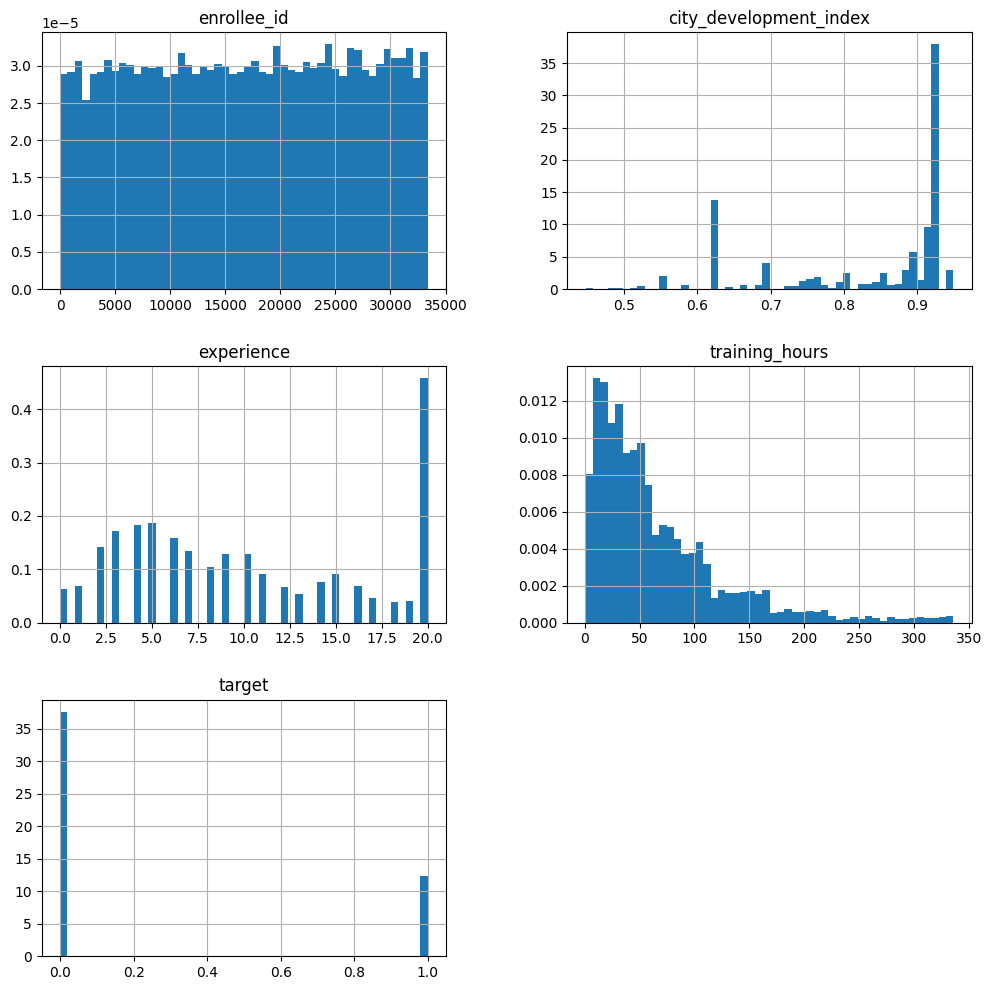

In [21]:

new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<Axes: >

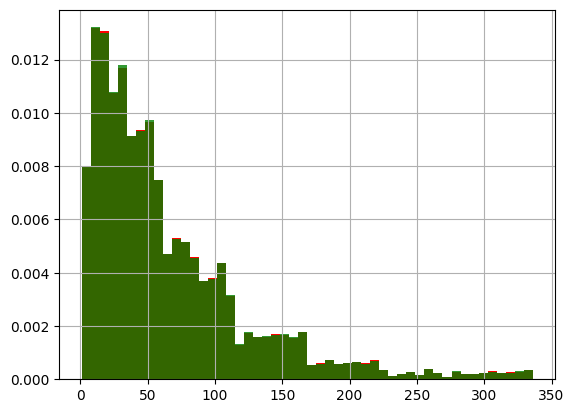

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

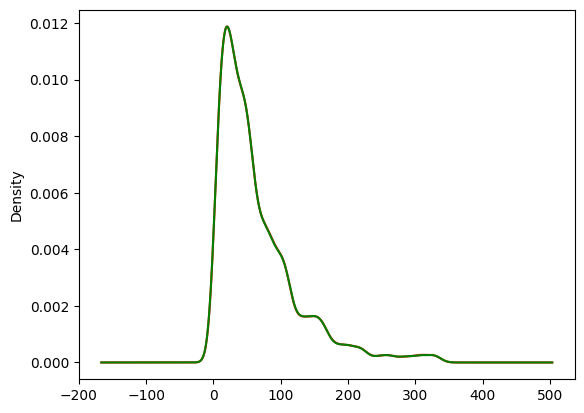

In [24]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: ylabel='Density'>

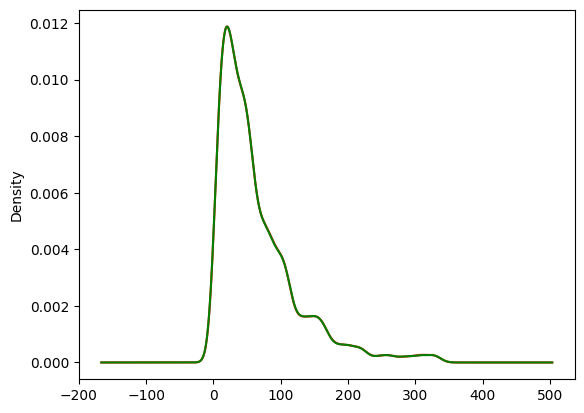

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

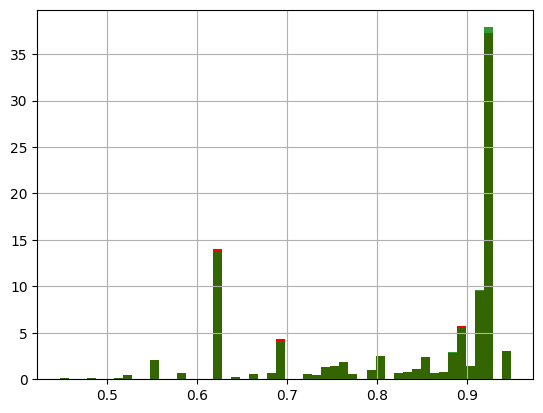

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)



<Axes: ylabel='Density'>

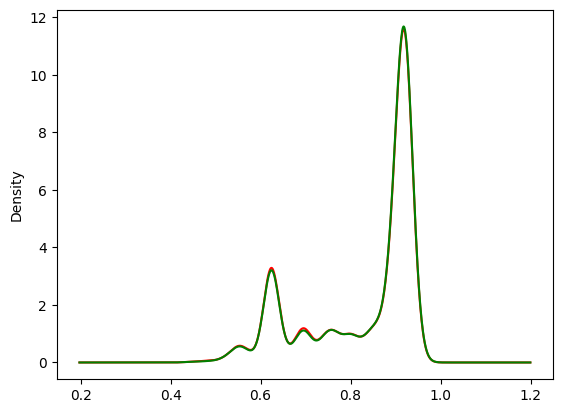

In [27]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')